# Exercise 1.1
1. Replicate the example above, but using the **make_moons** instead of the **make_circles** dataset. That is, replace `from sklearn.datasets import make_circles` with `from sklearn.datasets import make_moons` and use this new function to generate $\texttt{X}$ and $\texttt{y}$. Then, check how the linear, polynomial, and radial basis function performs on this new dataset (by calculating and reporting their test accuracies).
1. The default setting for $C$, the regularization parameter, is $1$. Try to adjust this (both up and down) and see how the performance of your models changes.
1. Try to split your training data (again using **train_test_split**) to obtain a validation set. Try to tune your **polynomial** SVM (by changing the degree of the kernel and C) to obtain the best model on your validation data. Apply this model to your test data. Did you improve your model's performance on the test data?

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-svm-2-classes.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

In [1]:
# Importing packages
import numpy as np
import tensorflow
import pandas as pd
import matplotlib
import scipy
import sklearn

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from matplotlib import pyplot as plt

(800, 2) (200, 2) (800,) (200,)


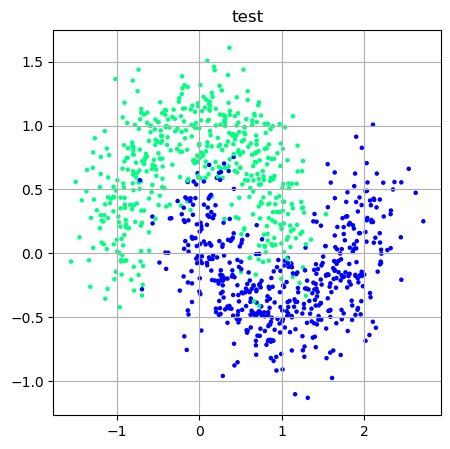

In [3]:
# We now creat a moon instead of a circle 
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)

# 'train_test split' gives us a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Create a smaller figure
plt.figure(figsize=(5, 5))
# Let us look at the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap("winter_r"), s=5)
plt.title("test")
plt.grid(True)
plt.show()

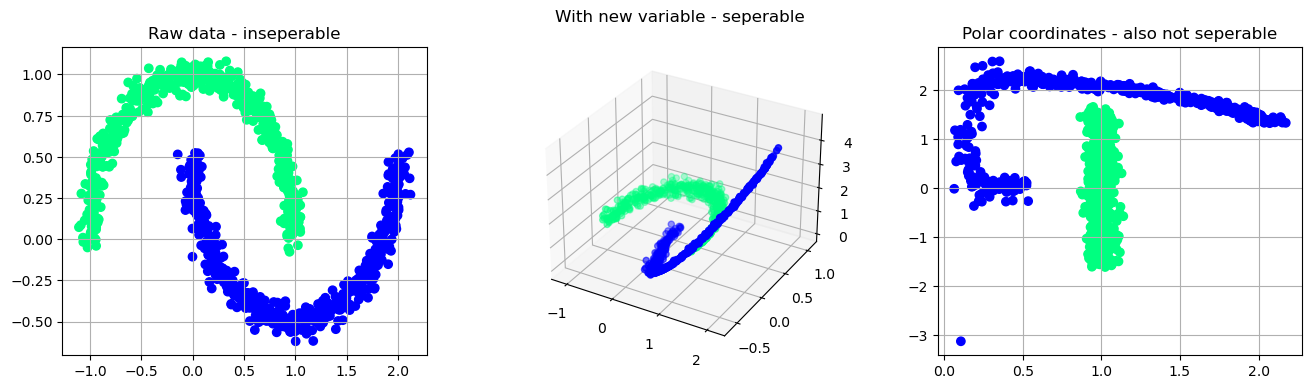

In [5]:
# 3d plot for fun
# Adding a new variable
z = X[:, 0] ** 2 + X[:, 1] ** 2
#Transforming our variables to new ones
radius = np.sqrt(np.square(X[:, 0]) + np.square(X[:, 1]))
theta = np.arctan2(X[:, 0], X[:, 1]) # This is so we can have it in euclidian space, x1 and x2 is radius now
#all of this is plotting
fig = plt.figure(figsize=plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap("winter_r"))
ax.grid(True)
plt.title('Raw data - inseperable')

ax = fig.add_subplot(1, 3, 2, projection ="3d")
ax.scatter3D(X[:, 0], X[:, 1], z, c=y, cmap=plt.get_cmap("winter_r"))
plt.title('With new variable - seperable \n')

ax = fig.add_subplot(1, 3, 3)
ax.scatter(radius, theta, c=y, cmap=plt.get_cmap("winter_r"))
ax.grid(True)
plt.title('Polar coordinates - also not seperable')

plt.show()

In [23]:
# Attempt to make a classe to change C
# now that we have our figures we can explore how 
# to devide the set my guess is polynomial due to the shape of the set
class svm_linear(Exception):
    __module__ = Exception.__module__
    def __init__ (self,c, X_train, X_test, y_test, y_train):
        self.slack = c

        self.svm_linear = svm.SVC(C=c,kernel='linear')
        self.svm_linear.fit(X_train, y_train)

        self.y_test_hat_linear = self.svm_linear.predict(X_test)
        self.accuracy_linear = accuracy_score(self.y_test_hat_linear, y_test)
        print(f'Linear SVM with C={c} {round(self.accuracy_linear * 100, 1)}% accuracy')

svm_linear(c=0.1, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
svm_linear(c=0.5, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
svm_linear(c=1, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
svm_linear(c=100, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

my_svm_linear = svm_linear(c=1, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Linear SVM with C=0.1 88.0% accuracy
Linear SVM with C=0.5 88.5% accuracy
Linear SVM with C=1 88.5% accuracy
Linear SVM with C=100 89.0% accuracy
Linear SVM with C=1 88.5% accuracy


Seen here is a 88,5% accuracy rating for a linear SVM which is more than for the circle which was only 46.0%. A higher C gives higher accuracy this is expected

In [24]:
#Estimate the polynomial of the 2nd degree
class svm_polynomial(Exception):
    __module__ = Exception.__module__
    def __init__ (self, c, deg, X_test, X_train, y_test, y_train):

        self.c = c
        self.deg = deg
        self.svm_poly = svm.SVC(C=c,kernel='poly', degree=deg)
        self.svm_poly.fit(X_train, y_train)

        self.y_test_hat_poly = self.svm_poly.predict(X_test)
        self.accuracy_poly = accuracy_score(self.y_test_hat_poly, y_test)
        print(f'Polynomial (of degree {deg}) with C={c} SVM achieved {round(self.accuracy_poly * 100, 1)}% accuracy')
        
svm_polynomial(c=0.1, deg=2, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
svm_polynomial(c=0.5, deg=2, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
svm_polynomial(c=1, deg=2, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
svm_polynomial(c=100, deg=2, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

my_svm_polynomial = svm_polynomial(c=1, deg=2, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)



Polynomial (of degree 2) with C=0.1 SVM achieved 79.5% accuracy
Polynomial (of degree 2) with C=0.5 SVM achieved 81.0% accuracy
Polynomial (of degree 2) with C=1 SVM achieved 80.5% accuracy
Polynomial (of degree 2) with C=100 SVM achieved 81.5% accuracy
Polynomial (of degree 2) with C=1 SVM achieved 80.5% accuracy


Still a good result however it is worse than the prvious result which was linear. Now we go on to the radial.

In [4]:
class svm_circular:
    def __init__(self, c, X_train, y_train, X_test, y_test):
        self.slack = c
        self.svm_rbf = svm.SVC(kernel='rbf')

        self.svm_rbf.fit(X_train, y_train)

        self.y_test_hat_rbf = self.svm_rbf.predict(X_test)
        self.accuracy_rbf = accuracy_score(self.y_test_hat_rbf, y_test)
        print(f'RBF SVM achieved with C={c} {self.accuracy_rbf*100}% accuracy')

svm_circular(c=0.1, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

svm_circular(c=0.5, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

svm_circular(c=1, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

my_svm_rbf= svm_circular(c=1, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
print(my_svm_rbf.accuracy_rbf)

RBF SVM achieved with C=0.1 97.0% accuracy
RBF SVM achieved with C=0.5 97.0% accuracy
RBF SVM achieved with C=1 97.0% accuracy
RBF SVM achieved with C=1 97.0% accuracy
0.97


This seems too good to be true 100%, i try not rounding affermatively 100% Ask if i am supposed to trust this

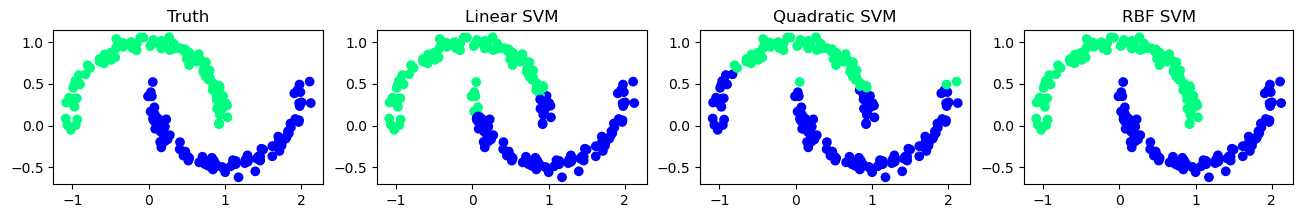

In [26]:
fig = plt.figure(figsize=plt.figaspect(0.1))
ax = fig.add_subplot(1, 4, 1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
           cmap=plt.get_cmap("winter_r"))
plt.title('Truth')

ax = fig.add_subplot(1, 4, 2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=my_svm_linear.y_test_hat_linear, 
           cmap=plt.get_cmap("winter_r"))
plt.title('Linear SVM')

ax = fig.add_subplot(1, 4, 3)
ax.scatter(X_test[:, 0], X_test[:, 1], c=my_svm_polynomial.y_test_hat_poly, 
           cmap=plt.get_cmap("winter_r"))
plt.title('Quadratic SVM')

ax = fig.add_subplot(1, 4, 4)
ax.scatter(X_test[:, 0], X_test[:, 1], c=my_svm_rbf.y_test_hat_rbf, 
           cmap=plt.get_cmap("winter_r"))
plt.title('RBF SVM')

plt.show()

You can see graphicallt why it is 100% accurate however i don't know why it is 1 to 1 there might be som cross contamination or it is just that good 

In [ ]:
# Start by splitting training data into train and a validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

# attempt to optimize poly

poly_degrees = [1, 2, 3, 4, 5] 
Cs = [0.1, 0.5, 1, 2, 3, 100, 1000]

results = []

for degree in poly_degrees:
    for C in Cs:
        svm_poly = svm.SVC(kernel='poly', degree=degree, C=C)
        svm_poly.fit(X_train, y_train)
        y_val_hat = svm_poly.predict(X_val)
        accuracy = accuracy_score(y_val_hat, y_val)

        results.append([accuracy, degree, C])

results = pd.DataFrame(results)
results.columns = ['Accuracy', 'Polynomial degree', 'C']
# print(results)

# Extract best parameters.
results[results['Accuracy'] == results['Accuracy'].max()]

(640, 2) (160, 2) (200, 2) (640,) (160,) (200,)


,Accuracy,Polynomial degree,C
33,0.95,5,100.0


In [ ]:
# Initialize your final model
svm_poly_best = svm.SVC(kernel='poly', degree=5, C = 1000)

# Use both training and validation data to fit it (np.concatenate "stacks" the array like rbind in R)
svm_poly_best.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# Predict on test data
y_val_hat_poly_best = svm_poly.predict(X_test)

# Obtain and check accuracy on test data
accuracy_poly_best = accuracy_score(y_val_hat, y_val)
print(f'Optimized polynomial SVM achieved {round(accuracy_poly_best * 100, 1)}% accuracy.')

Optimized polynomial SVM achieved 93.8% accuracy.


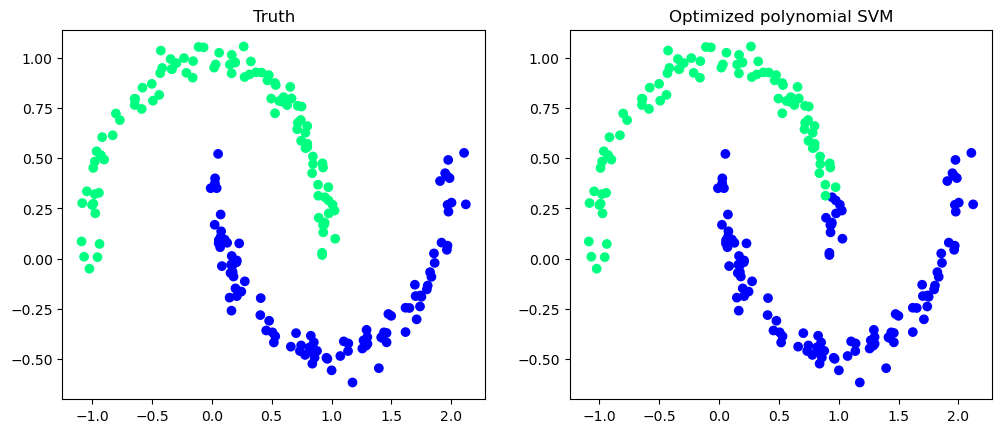

In [ ]:
# Visualize your results (you do not need to change anything in this block)
fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.get_cmap("winter_r"))
plt.title('Truth')

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_val_hat_poly_best, cmap=plt.get_cmap("winter_r"))
plt.title('Optimized polynomial SVM')

plt.show()